![Keras Logo](notebook_diagrams/keras.png)

# Keras Tutorial


Keras is a high-level neural network/deep learning package that is quite powerful - you can actually create a neural network model and train, test, and evaluate it in under 15 lines of code!  Keras is built on top of [TensorFlow](https://www.tensorflow.org/), a powerful, flexible framework that is used to build machine learning applications at scale.  While we won't study TensorFlow or PyTorch (another powerful neural network/deep learning framework) in this course, you are strongly encouraged to explore these packages as well!

Keras, and other machine learning packages, leverage the modularity of object-oriented code to create multi-million parameter neural networks using very few lines of code.

This Jupyter notebook uses documentation from Keras to provide a quick, hands-on introduction to this high-level machine learning API.  For reference, we used code from the following resource for the examples below: https://keras.io/.  If you'd like to look at another quick introduction to Keras, I would strongly recommend [30 Seconds to Keras](https://keras.io/#getting-started-30-seconds-to-keras), which is what this code is largely based off of.



# Installation and Imports

In [1]:
# If not already installed
!pip install keras
import keras

# OR
from tensorflow import keras

# Sequential model is very useful in Keras
from keras.models import Sequential, model_from_json, model_from_yaml

# Import different layers for defining our networks
from keras.layers import Dense, Conv2D

# Import numpy
import numpy as np

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# For reading paths
import os

Using TensorFlow backend.
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/conda/envs

## Core Data Structure in Keras: The Model
The core data structure in Keras is the model class, which has methods for compiling with an optimizer and loss function, fitting (training), evaluation (testing), and prediction.

The `model` class is one we will use for essentially all of our operations when we define, train, and test different neural network models.  For more information/documentation on Keras models, visit the link [here](https://keras.io/models/model/).

# Feedforward, Stacked Models from Sequential() Class
For this tutorial and course, our focus will be primarily on using the `Sequential` type of model.  Other types of models exist, and we encourage you to investigate them!  

The main idea with the `Sequential()` model is that we stack layers sequentially, one after one another.  Each layer we add to our model is cascaded with the rest of the layers in our model, by adding it to the network output.  The result we see after stacking these layers below is something similar to the picture below.

![Deep NN](notebook_diagrams/deep_nn.png)

### Let's Define a Sequential Keras Model
We can define our first model below!  We must first "instantiate" our Python model object, which creates the `Sequential` model object and runs the `__init__` (also known as constructor) method, which is run every time a Python object is created.

Next, we can add layers one at a time.  `Dense` is a type of neural network layer corresponding to fully connected layers.  We can think of fully connected layers as a set of weights in which each node/neuron in one layer is connected to every node/neuron in the next layer.  See an example in the diagram below.

![Fully Connected Layer](notebook_diagrams/fclayer.png)

Notice how each node/neuron in the first layer has a weight connecting it to a node/neuron in the second layer.'  With this in mind, let's create a **fully connected neural network** below.

In [2]:
# First, create the model
model = Sequential()  # Enables for stacking of layers

# Now add layers
model.add(Dense(units=64, activation='relu', input_dim=32))  # Input/first hidden layer
model.add(Dense(units=32, activation='relu'))  # Second layer
model.add(Dense(units=16, activation='relu'))  # Third layer
model.add(Dense(units=12, activation='relu'))  # Fourth layer
model.add(Dense(units=10, activation='softmax'))  # Output layer

# Now get information about the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                130       
Total params: 5,054
Trainable params: 5,054
Non-trainable params: 0
_________________________________________________________________
None


## Compiling, Training, and Evaluation
Like other supervised learning algorithms, the next machine learning development step will be to train and test our model.  We will use our fully-connected model from above.

We will first `compile` our model, which is a function used in Keras that provides our model with a loss function (which is needed for training), an optimizer (such as Stochastic Gradient Descent), and metrics over which to evaluate the model (such as accuracy or mean squared error).  Visit [this page](https://keras.io/models/model/) for more information on how the `compile` function is used.  

### Loss Functions We Will Use For Keras:

1. **Categorical Cross-Entropy**: Used for multi-class classification.  A network using this loss function should have the **SoftMax** activation function applied at the output.  Can be used by setting: `loss='categorical_crossentropy'`.


2. **Binary Cross-Entropy**: Used for binary classification.  A network using this loss function should have the **sigmoid** activation function applied at the output.  Can be used by setting: `loss='categorical_crossentropy'`.  Intuition: When we have linear activation functions in the hidden layers and a **sigmoid** activation at the output, this is just logistic regression!


3. **Mean Squared Error (MSE)**: Used for regression.  A network using this loss function should have the **Linear** or **ReLU** activation function applied at the output.  Can be used by setting: `loss='mean_squared_error'`.  Intuition: When we have linear activation functions in the hidden layers and output layer, this is just linear regression!

Keras has many other **loss**, **optimizer**, and **metric** options!  We highly encourage you to investigate these on your own!

In [3]:
# Use our model from above!
print(model.layers)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Fit model to data (x_train and y_train in this case) - data inputs need only be numpy arrays
from keras.datasets import cifar10  # Popular image dataset

# Split data into training and testing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

[<keras.layers.core.Dense object at 0x7f9af76ebd30>, <keras.layers.core.Dense object at 0x7f9af76ebe80>, <keras.layers.core.Dense object at 0x7f9b295390b8>, <keras.layers.core.Dense object at 0x7f9af7442d68>, <keras.layers.core.Dense object at 0x7f9af7464ba8>]


### Visualize Cifar Data
We'll be using the Cifar dataset for this example, which is a famous dataset that is used to train and provide a baseline evaluation for many neural network models in computer vision.

Let's look at some of the data we'll be visualizing!

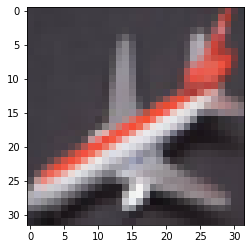

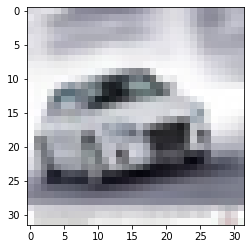

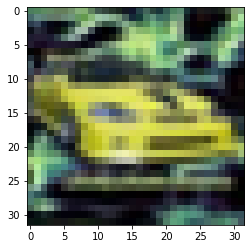

In [4]:
import numpy as np

N = len(x_train)

# Get random indices for showing data
random_indices = np.random.randint(low=0, high=N, size=3)

# Show images randomly
for index in random_indices:
    IMG = x_train[index]
    plt.imshow(IMG)
    plt.show()

### Training and Evaluating Our Model
With our data split, we are now ready to train and evaluate our neural network model!

Next week, we'll be diving into how our neural network models compare to some of the other models we've been analyzing in this course!

## Get Model Specs
We can also get model information using the specs below.  The `model` Python object contains useful information about the neural network, such as its inputs/outputs, parameters, layers, etc.  We can write a function to retrieve all of this information at once.

In [5]:
def get_model_specs(model):
    print(model.layers)  # Flattened list of tensors comprising model
    print(model.inputs)  # List of input tensors to model
    print(model.outputs)  # List of output tensors of model 
    print(model.summary())  # Brief summary of your Keras model
    print(model.get_config())  # Dict containing configuration of model

## Saving and Loading Models
Often times, we don't want to have to retrain models, and want to re-use them whenever we can.  We can do that by saving, loading, and sharing models!

This is especially true for when we try to solve problems in machine learning that have been solved in a similar way before.  For example, if we wanted to train a neural network to classify between mate and coffee using images of these objects, a good place to start would be a general object detector trained on a giant dataset called ImageNet.  

We won't have time to discuss it in this course, but if you're interested, training on pre-trained models for specific applications such as classifying between mate and coffee is a technique used in the field of [transfer learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/).

In [6]:
# pickle is also a very useful package for saving models
import pickle

# Get model information using function above
get_model_specs(model)

# Now define a path where we can save weights
savepath = os.path.join("/home", "ubuntu", "machine_learning_aws", "daily_user", "ml_package_tutorials")

# Save model to HDF5 file, and then reload it
hdf5_path = os.path.join(savepath, "hdf5_weights.ex.h5")
model.save_weights(hdf5_path)
model.load_weights(hdf5_path, by_name=False) 

# Save as JSON representation, and then reload it
json_string = model.to_json()
json_pickle_fname = os.path.join(savepath, "json_weights_ex.pkl")

with open(json_pickle_fname, "wb") as pkl_file:
    pickle.dump(json_string, pkl_file)
    pkl_file.close()
    

[<keras.layers.core.Dense object at 0x7f9af76ebd30>, <keras.layers.core.Dense object at 0x7f9af76ebe80>, <keras.layers.core.Dense object at 0x7f9b295390b8>, <keras.layers.core.Dense object at 0x7f9af7442d68>, <keras.layers.core.Dense object at 0x7f9af7464ba8>]
[<tf.Tensor 'dense_1_input:0' shape=(?, 32) dtype=float32>]
[<tf.Tensor 'dense_5/Softmax:0' shape=(?, 10) dtype=float32>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                204       
_______________________

## Get and Set Weights
We can get information about weights from above, and can also set weights using our own weight files, or, more commonly, using pre-trained weights!  The intuition here is that some person/company/school went through a lot of trouble to find weights that generally work well for solving problems, so we should use them!

Typically, you will use `get_weights` when saving a model, and `set_weights` when loading a model.

In [7]:
weights = model.get_weights()  # Returns weights of model

model.set_weights(weights)  # Sets weights of model to be weights arg

## Example of Loading Keras Datasets
Next week, we will be analyzing the MNIST dataset, which consists of a series of handwritten digits that have labels ranging from 0 to 9.  We will briefly dive into how we can use neural networks/deep learning with Keras to develop a classifier to predict a number given a handwritten digit - a.k.a. how to train a neural network to recognize handwritten digits.

In [8]:
# Import dataset
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Parameters for "Core" Keras Layers

Below are some of the most important parameters that can be utilized when creating the Keras `layer()` object:

1. **units**: Positive integer, dimensionality of the output space.
2. **activation**: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
3. **use_bias**: Boolean, whether the layer uses a bias vector.

The `layer()` object has other properties as well, but it is only recommended you change these if you have a strong reason to:

4. **kernel_initializer**: Initializer for the kernel weights matrix (see initializers).
5. **bias_initializer**: Initializer for the bias vector (see initializers).
6. **kernel_regularizer**: Regularizer function applied to the kernel weights matrix (see regularizer).
7. **bias_regularizer**: Regularizer function applied to the bias vector (see regularizer).
8. **activity_regularizer**: Regularizer function applied to the output of the layer (its "activation"). (see regularizer).
9. **kernel_constraint**: Constraint function applied to the kernel weights matrix (see constraints).
10. **bias_constraint**: Constraint function applied to the bias vector (see constraints).

## Important Keras Layers

Keras also supports the creation of different types of layers for different neural network applications.  For this course, we will mostly be focused on using **1, 4, 6, and 8**.    


1. **Dense**: Fully connected layer.
2. **Activation**: Layer for applying an activation function to an output.  
3. **Dropout**: Applies a dropout layer.  Probability of dropout is an argument in layer init.
4. **Flatten**: Layer typically used for turning 2D/3D into 1D vector (e.g. Conv layers to Dense).
5. **Conv1D**: 1D convolutional layer.
6. **Conv2D**: 2D convolutional layer.
7. **MaxPooling1D**: Layer for max pooling in 1D.
8. **MaxPooling2D**: Layer for max pooling in 2D.
9. **RNN & GRU**: Base classes for recurrent layers.
10. **BatchNormalization**: Batch normalization layer.

## Important Training Specifications

Keras, and deep learning as a whole, have a set of training parameters that are quite important for training models effectively.  These are:

1. **learning rate**: This controls how large the steps we take during training are.  To avoid having to repeat computations too many times, we should make this as large as possible, but not so large that our weights diverge!


2. **batch size**: This is the number of samples we process each time we take an optimization (gradient) step when training our neural network.  Generally, the larger the batch size, the more stable training will be.  Often GPU and/or CPU sizes impose limits on how large we can make our batch size.


3. **epochs**: This is the number of complete passes through the training dataset that we make as we train our models.  Generally, more epochs leads to better performance on the training dataset.  However, we must be wary of overfitting/overtraining - just because the model performs well on the training dataset doesn't mean the model will perform will on the validation/test dataset.

## In-Class Exercise: Build Your Own Neural Network for Binary Classification!

The best way to learn how to use these packages is to try them out for yourself!  Let's go through the semantics of building a neural network model and training it.  We'll use auto-generated data to see how well our neural network can make predictions.

In [9]:
# Define a function for generating a dataset
def generate_features(n=10000):
    
    # Generate the un-rotated data
    x1 = np.random.normal(loc=0, scale=5, size=n)
    x2 = np.random.normal(loc=0, scale=1, size=n)
    stacked_data = np.vstack((x1, x2))

    # Generate a random angle for rotation
    theta = np.random.randint(low=0, high=360)
    
    # Make rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))

    # Rotate data
    return R @ stacked_data

def generate_labels(D):
    labels = np.array([1 if np.linalg.norm(D[:,i]) < 2.5 else 0 for i in range(D.shape[1])])
    return labels

def plot(D, L):
    num_ones = len(np.nonzero(L)[0])
    ones = np.zeros((num_ones,2))
    zeros = np.zeros((D.shape[1]-num_ones,2))
    
    one_index = 0
    zero_index = 0
    for i in range(len(L)):
        if L[i] == 1:
            ones[one_index] = D[:,i]
            one_index += 1

        else:
            zeros[zero_index] = D[:,i]
            zero_index += 1
    
    l1 = plt.scatter(ones[:,0], ones[:,1], color='b')
    l0 = plt.scatter(zeros[:,0], zeros[:,1], color='r')
    plt.title("Graph of Binary Elliptical Dataset")
    plt.legend((l1, l0), ("Label = 1", "Label = 0"))
    plt.show()
    
def split_train_test(D, L, test_split=0.2):
    split_num = int((1-test_split) * D.shape[1])
    D_train = D[:,:split_num]
    D_test = D[:,split_num:]
    L_train = L[:split_num]
    L_test = L[split_num:]
    return D_train, D_test, L_train, L_test


# Generate dataset and labels
D = generate_features()
L = generate_labels(D)
D_train, D_test, L_train, L_test = split_train_test(D, L)


#### Plot Data
We can visualize these different classes using `matplotlib`. 

Plotting Train Data


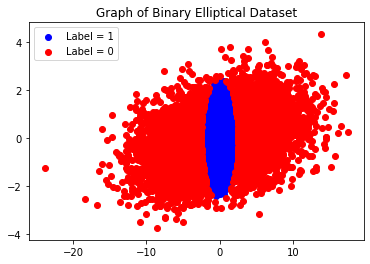

Plotting Test Data


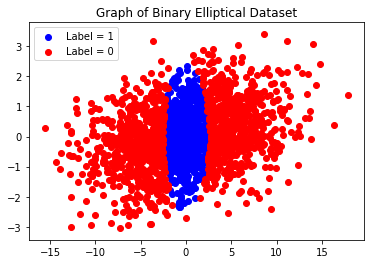

In [10]:
print("Plotting Train Data")
plot(D_train, L_train)

print("Plotting Test Data")
plot(D_test, L_test)

#### Your Turn
Can you design a neural network to learn this representation?  Some starting code is provided.  We'll compare how well your prediction does both quantiatively and visually.

What accuracies can you achieve on this test set?  Experiment with the following model and model parameters:

1. `layers`: You can change the number and types of layers in the model specification.


2. `EPOCHS`: This is the number of complete passes we make through the training data.


In [11]:
# First, initialize model
my_model = Sequential()

# Now, add layers to your network! HINT: Make sure you use "activation=sigmoid" at your output layer
my_model.add(Dense(units=32, activation='relu', input_dim=2))  # Input/first hidden layer
"""<ADD MORE LAYERS HERE>"""

# Compile the model - what loss should we use?  Remember we're doing 1/0 classification.
LOSS = "binary_crossentropy"
my_model.compile(loss=LOSS,
              optimizer='sgd',
              metrics=['accuracy'])

# Now train the model!
EPOCHS = """<SET EPOCHS HERE>"""

# Now we are ready to fit our model!
my_model.fit(D_train.T, L_train.T, epochs=EPOCHS, batch_size=32)

# Evaluate the model on the training dataset
loss_and_metrics = my_model.evaluate(D_test.T, L_test.T, batch_size=128)

# Find predictions on the test dataset
classes = my_model.predict(D_test.T, batch_size=128)
classes[classes >= 0.5] = 1
classes[classes < 0.5] = 0



ValueError: Error when checking target: expected dense_6 to have shape (32,) but got array with shape (1,)

In [ ]:
# Now compare plots to see how we did!
print("Predicted classes")
plot(D_test, classes)

print("Actual classes")
plot(D_test, L_test)

There is one peculiar thing about this dataset that you probably won't find with many other datasets.  Do you know what it is?  Hint: Think about how our samples were generated (independently and identically-distributed).  Does the split we have for our training and testing datasets affect the distribution of each?

## ADDITIONAL CONTENT: Modifying the Model() Class for Fully-Customizable Models
We can modify the `Model()` class in Keras to create flexible models with our choice of layers, actvation functions, etc.  

The code below is more similar to the code we would see when building models in `pytorch` or `tensorflow`, which are machine learning packages that provide the user more flexibility with defining models and training and evaluation procedures, at the price of being somewhat more lower-level.  We will not be using these frameworks in this course, but we strongly encourage you to explore these frameworks in greater detail if you're interested.  Both `pytorch` and `tensorflow` are free and open-source, so you could start using them right now if you wanted to!


In [12]:
import keras

class SimpleMLP(keras.Model):
    
    # This function is known as the "constructor" for class objects
    def __init__(self, use_bn=False, use_dp=False, num_classes=10):
        
        # "Inherits from the base keras.Model class"
        super(SimpleMLP, self).__init__(name='mlp')
        self.use_bn = use_bn
        self.use_dp = use_dp
        self.num_classes = num_classes
        
        # Define layers of neural network model
        self.dense1 = keras.layers.Dense(32, activation='relu')
        self.dense2 = keras.layers.Dense(num_classes, activation='softmax')
        if self.use_dp:
            self.dp = keras.layers.Dropout(0.5)
        if self.use_bn:
            self.bn = keras.layers.BatchNormalization(axis=-1)
    
    # Function for passing an input through the neural network
    def call(self, inputs):
        x = self.dense1(inputs)
        if self.use_dp:
            x = self.dp(x)
        if self.use_bn:
            x = self.bn(x)
        return self.dense2(x)

# Create a model, compile it with a loss function, optimizer, and metric, and then train it!
model = SimpleMLP()
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])